In [82]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [14]:
holidays = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\holidays_events.csv')
oil = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\oil.csv')
sample_submission = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\sample_submission.csv')
stores = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\stores.csv')
test = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\test.csv')
train = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\train.csv')
#transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\transactions.csv')
transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\transactions3.csv')
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\temp.csv')


In [16]:
temp['date'] = pd.to_datetime(temp['date'])

In [236]:
temp_2013 = temp[temp['date'].dt.year==2013]
temp_2014 = temp[temp['date'].dt.year==2014]
temp_2015 = temp[temp['date'].dt.year==2015]
temp_2016 = temp[temp['date'].dt.year==2016]
temp_2017 = temp[temp['date'].dt.year==2017]

In [116]:
temp_2016.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'transactions', 'day_of_week', 'oil_price',
       'magnitude', 'deaths', 'local_holiday', 'regional_holiday',
       'national_holiday', 'event_holiday', 'wage', 'year', 'month', 'day'],
      dtype='object')

## 요일별 평균 매출 계산

In [218]:
# 요일별 평균 매출 계산
pivot_df = temp_2016[['date','store_nbr','sales','day_of_week']].pivot_table(index='store_nbr', columns='day_of_week', values='sales', aggfunc='mean').fillna(0)

In [220]:
# 요일 순서 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df[days_order]

In [221]:
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pivot_df)

# PCA 결과를 DataFrame으로 변환
X_EMM = pd.DataFrame(X_pca, columns=['AXIS1', 'AXIS2'])

print(X_EMM.head())


         AXIS1       AXIS2
0  -403.795809 -267.487572
1   112.862936  -38.858667
2  1852.473410 -121.422318
3   -65.214171   44.481551
4  -399.405730  -31.352242


day_of_week       Monday     Tuesday    Wednesday    Thursday       Friday  \
store_nbr                                                                    
1             333.025242  320.688543   406.504990  303.233950   349.354474   
2             512.583966  435.091947   460.428898  387.364376   462.385053   
3            1061.618122  956.881772  1158.912181  855.197414  1080.999378   
4             384.263981  348.179200   406.935420  310.253757   375.130319   
5             302.202330  273.228505   295.138596  252.050670   289.930361   

day_of_week     Saturday       Sunday  cluster  
store_nbr                                       
1             333.079891   154.622781        0  
2             547.969337   616.683446        2  
3            1337.365908  1483.570949        1  
4             484.444161   595.008779        0  
5             327.299258   351.941943        0  


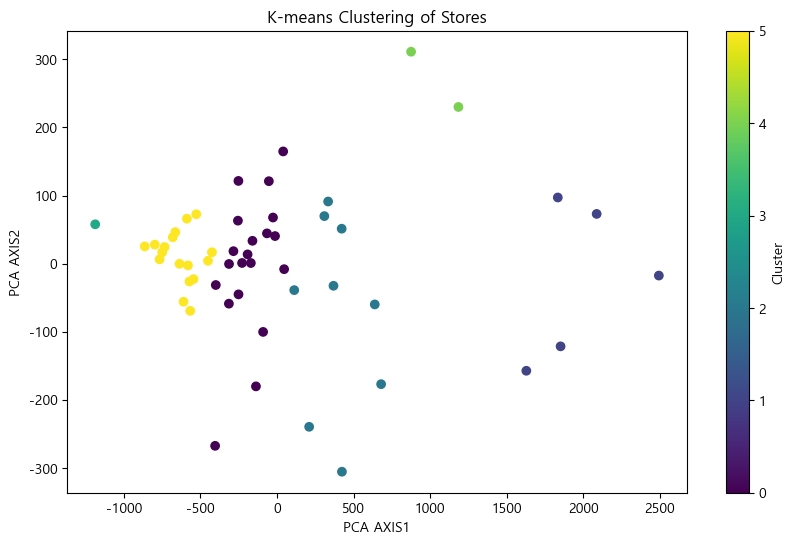

In [222]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=6, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_pca)

print(pivot_df.head())

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_EMM['AXIS1'], X_EMM['AXIS2'], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('K-means Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [223]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
sil_score = silhouette_score(X_pca, pivot_df['cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.4996453312712994


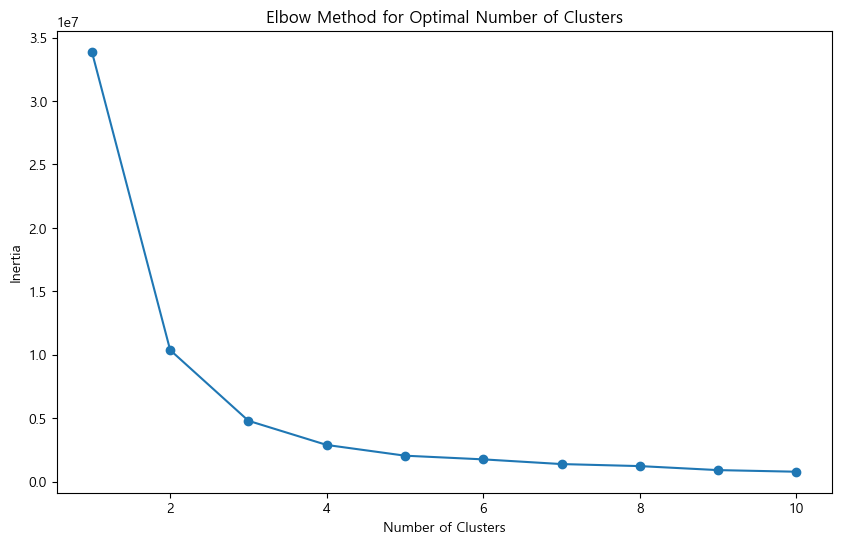

In [126]:
# 엘보우 방법을 사용하여 적절한 클러스터 수 찾기
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


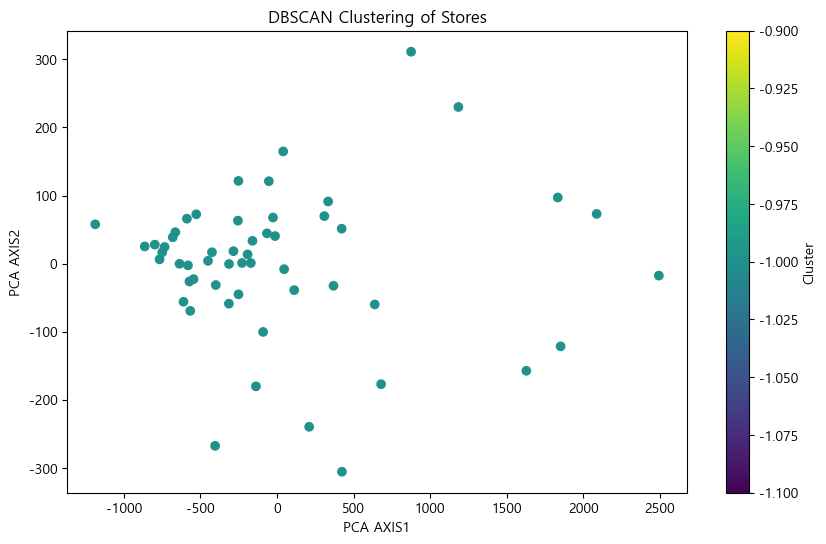

In [228]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca)

# 결과를 DataFrame에 저장
pivot_df['cluster'] = clusters_dbscan

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('DBSCAN Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


## 평균 매출

In [129]:
# 평균 매출 계산
pivot_df = temp_2016[['date','store_nbr','sales']].pivot_table(index='store_nbr', values='sales', aggfunc='mean').fillna(0)

In [132]:
pivot_df.reset_index(inplace=True)

In [142]:
# Scaling
scaler = MinMaxScaler().fit(pivot_df)
data_scal = scaler.transform(pivot_df)

In [145]:
# PCA Fitting
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(data_scal)
print("PCA Output shape : {}".format(X_pca.shape))
X_EMM = pd.DataFrame(X_pca[:,:2], columns=['AXIS1','AXIS2'])

PCA Output shape : (54, 4)


In [146]:
# EigenValue
print(pca.explained_variance_)
# EigenValue Ratio
print(pca.explained_variance_ratio_)

[0.19966479 0.12234153 0.08030525 0.02735308]
[0.46469913 0.28473725 0.18690215 0.06366146]


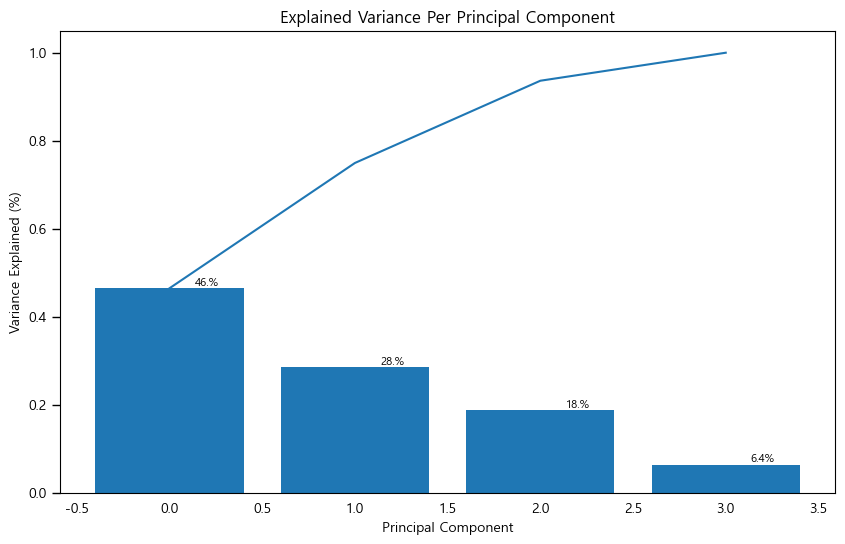

In [147]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=8)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

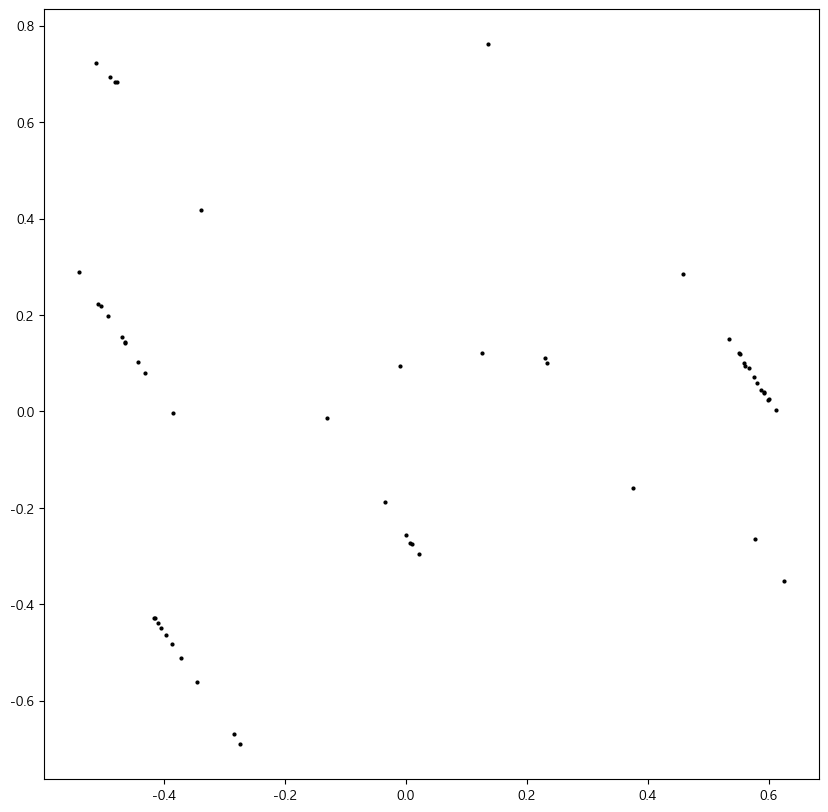

In [148]:
# 분포 Plotting
plt.figure(figsize=(10,10))
plt.scatter(X_EMM.iloc[:,0], X_EMM.iloc[:,1], s=4, c='black')
plt.show()

In [149]:
# TSNE
X_TSNE = TSNE(n_components=2, n_iter=500, n_jobs=-1).fit_transform(data_scal)
X_EMM_T = pd.DataFrame(X_TSNE[:, :2], columns=['AXIS1','AXIS2'])

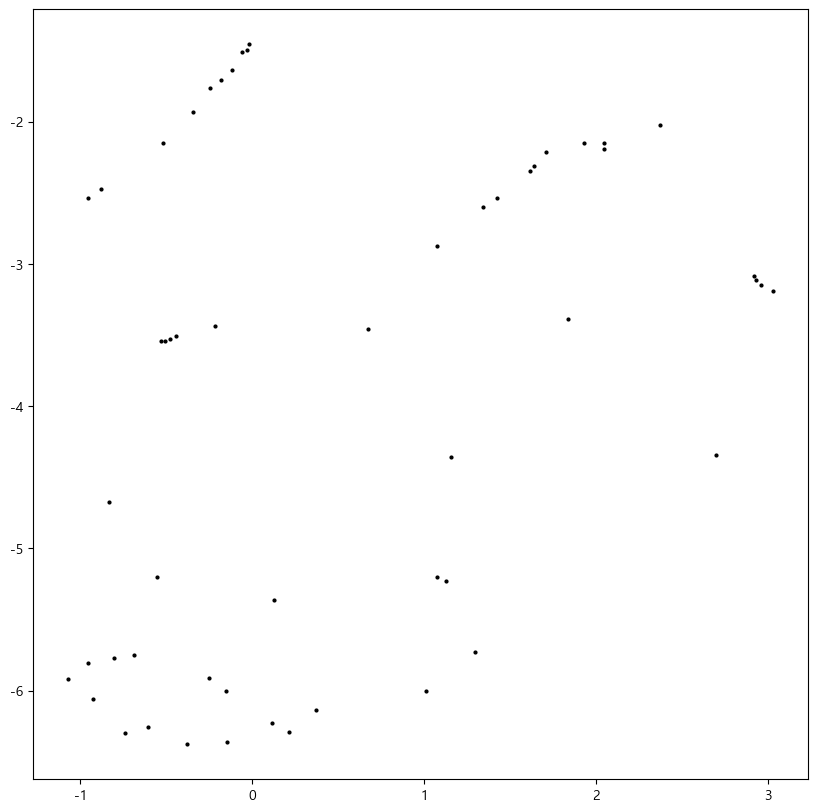

In [150]:
# 분포 Plotting
plt.figure(figsize=(10,10))
plt.scatter(X_EMM_T.iloc[:,0], X_EMM_T.iloc[:,1], s=4, c='black')
plt.show()

   store_nbr        sales  cluster_tsne  cluster
0          1   314.943356             0        0
1          2   488.668592             3        2
2          3  1132.962115             4        2
3          4   414.476104             3        2
4          5   298.735491             0        0


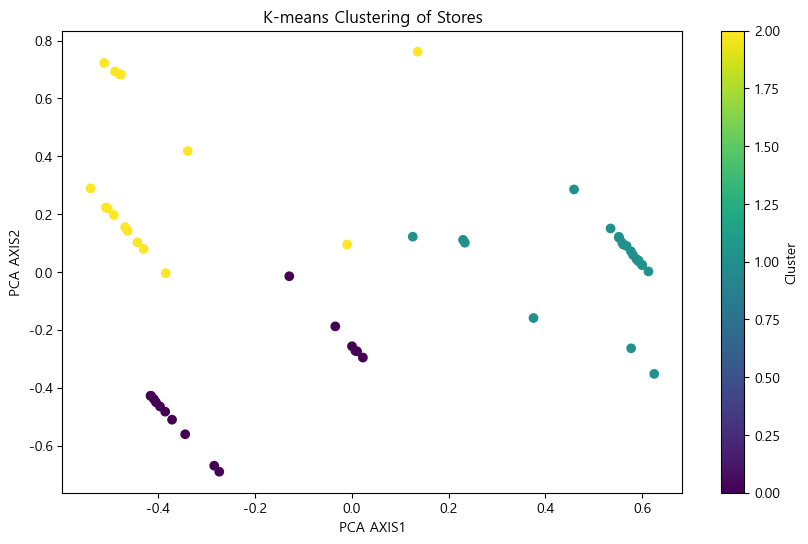

In [160]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_pca)

print(pivot_df.head())

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_EMM['AXIS1'], X_EMM['AXIS2'], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('K-means Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [164]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
sil_score = silhouette_score(X_pca, pivot_df['cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.4536876695770672


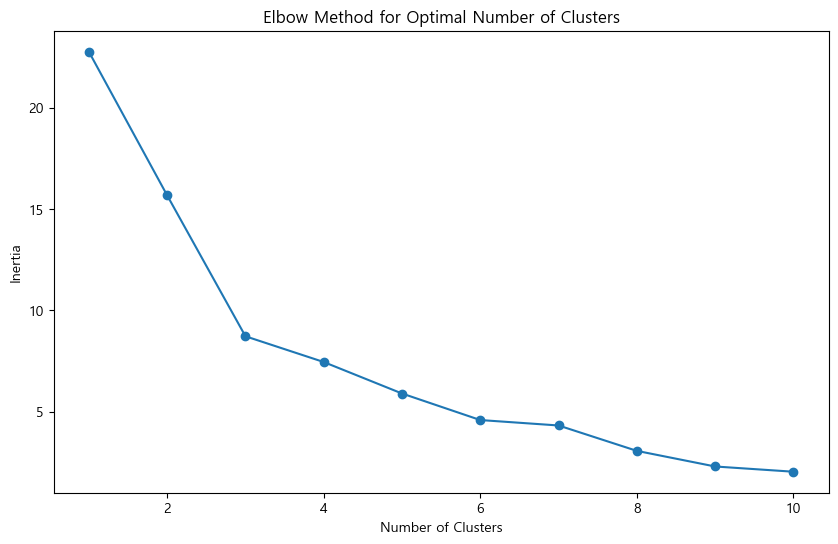

In [165]:
# 엘보우 방법을 사용하여 적절한 클러스터 수 찾기
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


## 상점별, 카테고리별 매출

In [186]:
# 상점별, 카테고리별 매출 합계 계산
pivot_df = temp_2016[['date','store_nbr','family','sales']].pivot_table(index='store_nbr', columns='family', values='sales', aggfunc='sum', fill_value=0)

In [187]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_df)

# PCA 및 클러스터링 다시 수행
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pivot_scaled)


family     AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS   BREAD/BAKERY  \
store_nbr                                                                   
1                1600          0    1040     745377    107  140995.494965   
2                2424         39    2388    1148902    184  250174.746000   
3                4296        288    5025    3127988    322  494088.769400   
4                1499          7    1992    1048209    159  164355.901950   
5                2300        143    2254     663140    130  130773.054920   

family     CELEBRATION  CLEANING   DAIRY           DELI  ...          MEATS  \
store_nbr                                                ...                  
1                 5727    240246  266232   46210.000014  ...  108956.677087   
2                 5290    355120  357865   90683.372980  ...  190136.855930   
3                18585    775426  878875  145723.502990  ...  313006.691660   
4                 3851    319027  328446   83132.139020  ...  133

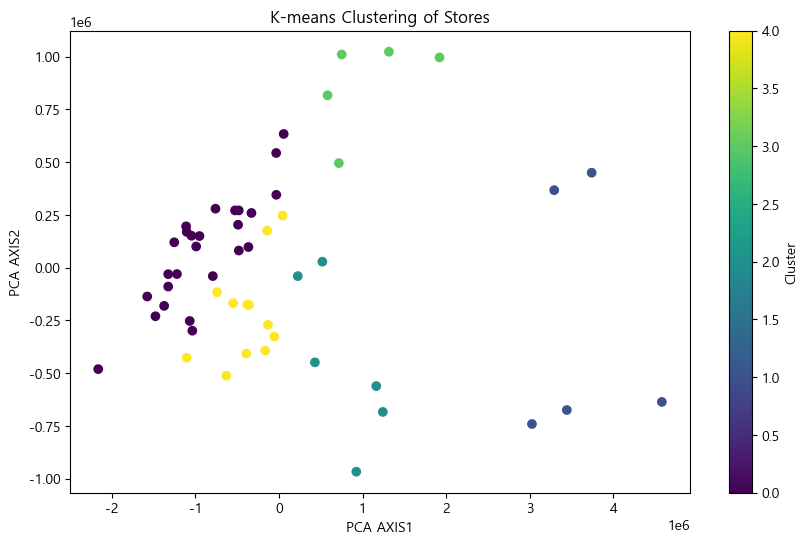

In [188]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_pca)

print(pivot_df.head())

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_EMM['AXIS1'], X_EMM['AXIS2'], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('K-means Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [189]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
sil_score = silhouette_score(X_pca, pivot_df['cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.40244643983279954


## DBSCAN

In [203]:
# 상점별, 카테고리별 매출 평균
#pivot_df =temp_2016[['date','store_nbr','family','sales']].groupby(['store_nbr','family']).mean('sales').reset_index()

# 상점별 매출 평균
pivot_df =temp_2016[['date','store_nbr','sales']].groupby(['store_nbr']).mean('sales').reset_index()

# 데이터 스케일링
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_df)

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pivot_scaled)

In [204]:
pivot_df

,store_nbr,sales
0,1,314.943356
1,2,488.668592
2,3,1132.962115
3,4,414.476104
4,5,298.735491
5,6,550.879999
6,7,624.284829
7,8,680.428051
8,9,564.072826
9,10,190.219232


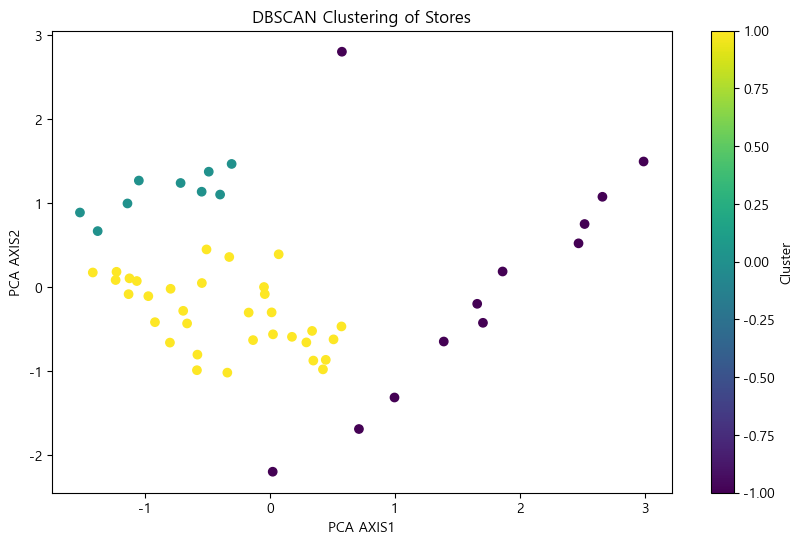

In [208]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca)

# 결과를 DataFrame에 저장
pivot_df['cluster'] = clusters_dbscan

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('DBSCAN Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [209]:
from sklearn.metrics import silhouette_score

# -1로 레이블된 노이즈 포인트를 제외하고 실루엣 스코어 계산
mask = clusters_dbscan != -1
if np.sum(mask) > 0:  # 클러스터가 존재하는지 확인
    sil_score = silhouette_score(X_pca[mask], clusters_dbscan[mask])
    print(f'Silhouette Score: {sil_score}')
else:
    print('No clusters found')


Silhouette Score: 0.44609616539361674


In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

# DBSCAN을 위한 매개변수 그리드 정의
param_grid = {
    'eps': np.arange(0.1, 1.1, 0.1),
    'min_samples': range(3, 10)
}

# GridSearchCV를 사용하여 최적의 매개변수 찾기
dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, scoring='silhouette', cv=3)
grid_search.fit(X_pca)

# 최적의 매개변수 출력
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Silhouette Score: {grid_search.best_score_}")


InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'precision_micro', 'neg_mean_gamma_deviance', 'recall', 'roc_auc_ovr_weighted', 'adjusted_rand_score', 'fowlkes_mallows_score', 'jaccard', 'roc_auc', 'jaccard_micro', 'neg_mean_absolute_percentage_error', 'recall_micro', 'v_measure_score', 'accuracy', 'balanced_accuracy', 'neg_log_loss', 'neg_brier_score', 'neg_root_mean_squared_log_error', 'r2', 'f1_macro', 'jaccard_samples', 'max_error', 'normalized_mutual_info_score', 'precision_samples', 'top_k_accuracy', 'average_precision', 'neg_mean_absolute_error', 'matthews_corrcoef', 'neg_root_mean_squared_error', 'recall_weighted', 'precision_weighted', 'f1_micro', 'roc_auc_ovo', 'recall_samples', 'jaccard_weighted', 'roc_auc_ovr', 'neg_median_absolute_error', 'f1', 'precision', 'positive_likelihood_ratio', 'recall_macro', 'homogeneity_score', 'neg_negative_likelihood_ratio', 'jaccard_macro', 'explained_variance', 'neg_mean_poisson_deviance', 'roc_auc_ovo_weighted', 'f1_weighted', 'adjusted_mutual_info_score', 'f1_samples', 'neg_mean_squared_log_error', 'precision_macro', 'rand_score', 'mutual_info_score', 'neg_mean_squared_error', 'completeness_score'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'silhouette' instead.

## 월별 매출

In [239]:
temp_2016

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions,...,magnitude,deaths,local_holiday,regional_holiday,national_holiday,event_holiday,wage,year,month,day
36036,2016-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,0.0,...,0.0,0.0,0,0,1,0,0,2016,1,1
36037,2016-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,0.0,...,0.0,0.0,0,0,1,0,0,2016,1,1
36038,2016-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,0.0,...,0.0,0.0,0,0,1,0,0,2016,1,1
36039,2016-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,0.0,...,0.0,0.0,0,0,1,0,0,2016,1,1
36040,2016-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,0.0,...,0.0,0.0,0,0,1,0,0,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993392,2016-12-31,9,POULTRY,687.853,1,Quito,Pichincha,B,6,2998.0,...,0.0,0.0,0,0,1,0,1,2016,12,31
2993393,2016-12-31,9,PREPARED FOODS,100.405,1,Quito,Pichincha,B,6,2998.0,...,0.0,0.0,0,0,1,0,1,2016,12,31
2993394,2016-12-31,9,PRODUCE,3091.356,3,Quito,Pichincha,B,6,2998.0,...,0.0,0.0,0,0,1,0,1,2016,12,31
2993395,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,Quito,Pichincha,B,6,2998.0,...,0.0,0.0,0,0,1,0,1,2016,12,31


In [238]:
temp_2016['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [240]:
# 월별 매출 합계 계산
monthly_sales = temp_2016.pivot_table(index='store_nbr', columns='month', values='sales', aggfunc='mean', fill_value=0).reset_index()

print(monthly_sales.head())


month  store_nbr            1            2            3            4  \
0              1   306.645648   301.498965   306.637136   354.244005   
1              2   472.592626   456.349723   454.578721   617.119339   
2              3  1152.004284  1097.445469  1085.384238  1221.931925   
3              4   426.130256   410.948883   403.798338   441.614308   
4              5   294.821660   288.971351   290.249306   297.937882   

month            5            6            7            8            9  \
0       305.252586   310.778997   300.081299   291.608685   304.051345   
1       595.043661   447.820021   437.365007   410.736717   453.841773   
2      1121.891100  1060.836267  1052.848282  1014.340135  1111.043276   
3       412.382435   393.468581   388.194968   361.799585   398.063968   
4       299.467641   285.478108   297.163381   295.196783   278.189513   

month           10           11           12  
0       316.897206   315.322218   367.938618  
1       473.099232   481.402

In [255]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store_nbr  54 non-null     int64  
 1   1          54 non-null     float64
 2   2          54 non-null     float64
 3   3          54 non-null     float64
 4   4          54 non-null     float64
 5   5          54 non-null     float64
 6   6          54 non-null     float64
 7   7          54 non-null     float64
 8   8          54 non-null     float64
 9   9          54 non-null     float64
 10  10         54 non-null     float64
 11  11         54 non-null     float64
 12  12         54 non-null     float64
 13  cluster    54 non-null     int32  
dtypes: float64(12), int32(1), int64(1)
memory usage: 5.8 KB


In [248]:
from sklearn.preprocessing import StandardScaler

# 인덱스를 제외한 나머지 데이터 스케일링
scaler = StandardScaler()
monthly_sales_scaled = scaler.fit_transform(monthly_sales.drop(columns='store_nbr'))

print(monthly_sales_scaled[:5])


[[-0.4376421  -0.45051557 -0.41872297 -0.41775073 -0.50913781 -0.3997927
  -0.47086623 -0.44563603 -0.39713753 -0.38948983 -0.45027269 -0.51969203]
 [ 0.13239519  0.11575632  0.13388631  0.41793116  0.52041177  0.12370694
   0.04774907  0.01668515  0.11888828  0.12563755  0.0632213   0.03207618]
 [ 2.46621278  2.46017174  2.49014725  2.34063313  2.39215873  2.46544208
   2.37285413  2.35919551  2.38293774  2.34344408  2.22373219  2.24021079]
 [-0.02720569 -0.05026947 -0.05579471 -0.14000014 -0.12853433 -0.08391673
  -0.1380001  -0.17323381 -0.07326544 -0.03695022 -0.09013536 -0.19641201]
 [-0.47825817 -0.49632766 -0.47993677 -0.59674815 -0.52969016 -0.49644264
  -0.48188922 -0.43171107 -0.48623116 -0.5223338  -0.46171045 -0.51371491]]


In [249]:
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(monthly_sales_scaled)

print(X_pca[:5])


[[-1.53198497 -0.04658339]
 [ 0.53343386  0.14506212]
 [ 8.23808952  0.10759359]
 [-0.34465771 -0.01067908]
 [-1.72475781 -0.04094836]]


In [250]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 결과를 DataFrame에 저장
monthly_sales['cluster'] = clusters

print(monthly_sales.head())


month  store_nbr            1            2            3            4  \
0              1   306.645648   301.498965   306.637136   354.244005   
1              2   472.592626   456.349723   454.578721   617.119339   
2              3  1152.004284  1097.445469  1085.384238  1221.931925   
3              4   426.130256   410.948883   403.798338   441.614308   
4              5   294.821660   288.971351   290.249306   297.937882   

month            5            6            7            8            9  \
0       305.252586   310.778997   300.081299   291.608685   304.051345   
1       595.043661   447.820021   437.365007   410.736717   453.841773   
2      1121.891100  1060.836267  1052.848282  1014.340135  1111.043276   
3       412.382435   393.468581   388.194968   361.799585   398.063968   
4       299.467641   285.478108   297.163381   295.196783   278.189513   

month           10           11           12  cluster  
0       316.897206   315.322218   367.938618        0  
1       47

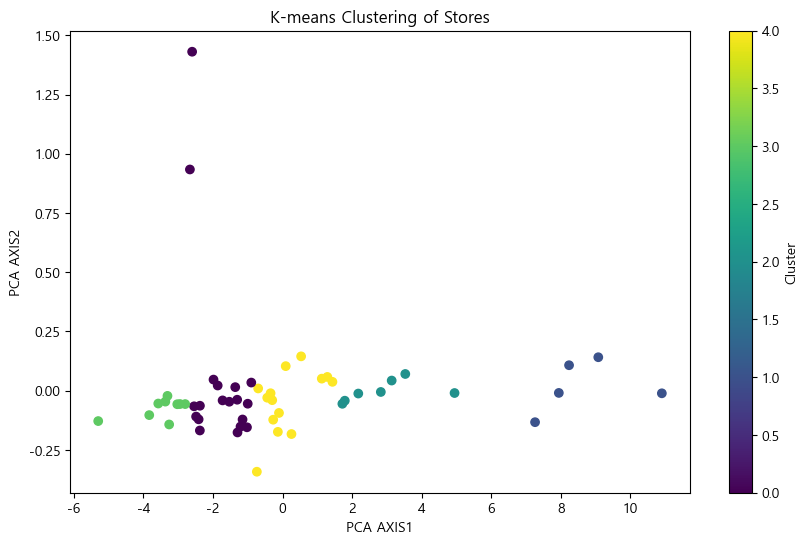

In [251]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('K-means Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [252]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.4454189727215283


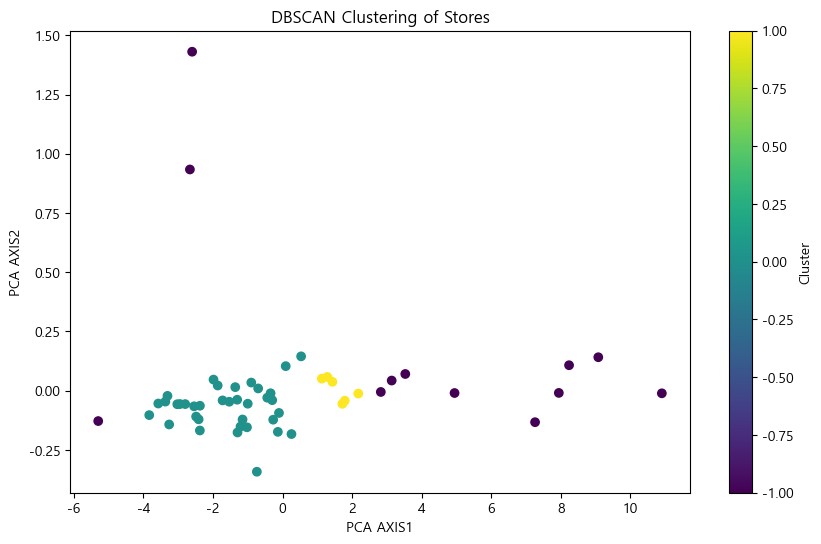

In [253]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca)

# 결과를 DataFrame에 저장
pivot_df['cluster'] = clusters_dbscan

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('DBSCAN Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [254]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.4454189727215283


## 품목별 매출

In [256]:
temp_2016['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [277]:
pivot_df = temp_2016[temp_2016['family']=='AUTOMOTIVE'][['store_nbr','date','month','sales']].groupby(['store_nbr','month']).mean('sales').reset_index(drop=False)

In [278]:
pivot_df

,store_nbr,month,sales
0,1,1,4.709677
1,1,2,4.448276
2,1,3,5.419355
3,1,4,5.300000
4,1,5,4.709677
...,...,...,...
643,54,8,6.548387
644,54,9,5.166667
645,54,10,6.645161
646,54,11,7.466667


In [279]:
# Scaling
scaler = MinMaxScaler().fit(pivot_df)
data_scal = scaler.transform(pivot_df)

In [280]:
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pivot_df)

# PCA 결과를 DataFrame으로 변환
X_EMM = pd.DataFrame(X_pca, columns=['AXIS1', 'AXIS2'])

print(X_EMM.head())


       AXIS1     AXIS2
0  26.584998  1.494854
1  26.604940  0.948997
2  26.532125  1.576679
3  26.541376  1.166075
4  26.586073  0.307027


In [281]:
# EigenValue
print(pca.explained_variance_)
# EigenValue Ratio
print(pca.explained_variance_ratio_)

[244.59628644  14.60011897]
[0.90299006 0.05390009]


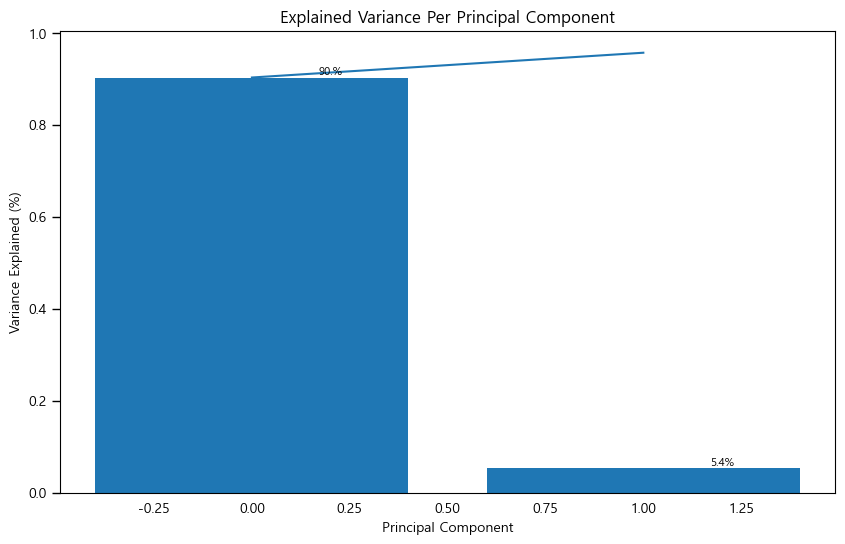

In [282]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=8)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

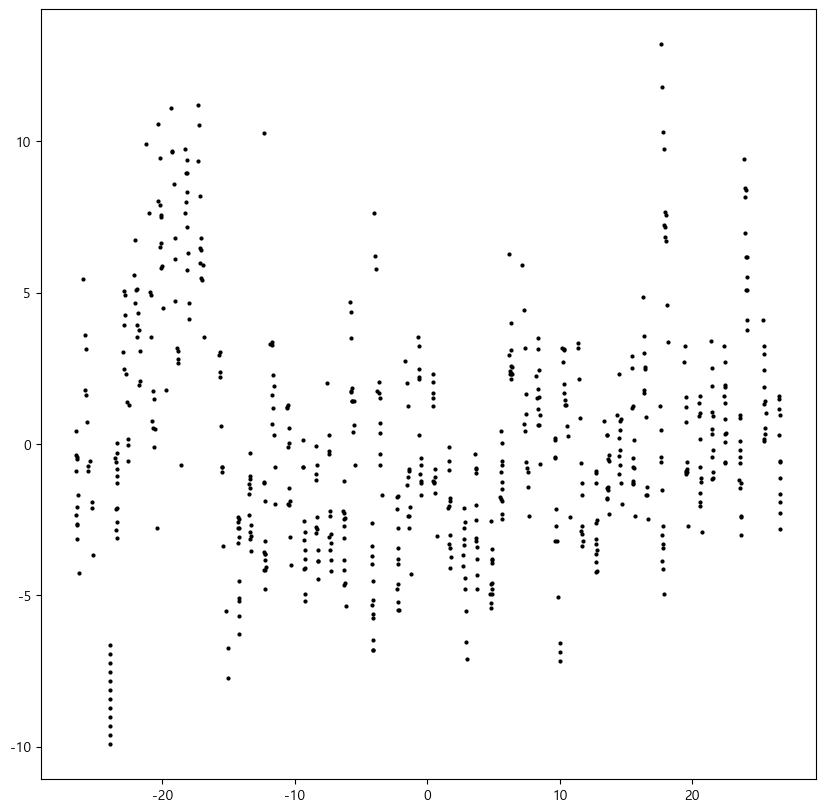

In [283]:
# 분포 Plotting
plt.figure(figsize=(10,10))
plt.scatter(X_EMM.iloc[:,0], X_EMM.iloc[:,1], s=4, c='black')
plt.show()

   store_nbr  month     sales  cluster
0          1      1  4.709677        2
1          1      2  4.448276        2
2          1      3  5.419355        2
3          1      4  5.300000        2
4          1      5  4.709677        2


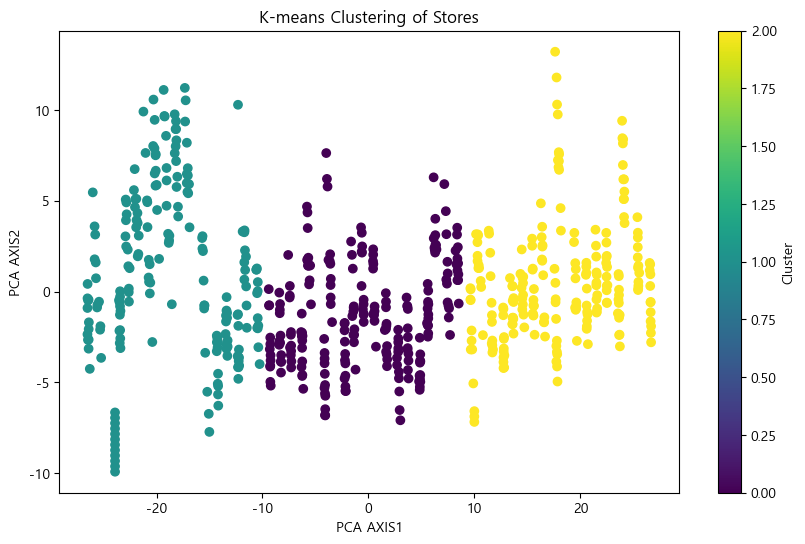

In [289]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_pca)

print(pivot_df.head())

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_EMM['AXIS1'], X_EMM['AXIS2'], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('K-means Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [290]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
sil_score = silhouette_score(X_pca, pivot_df['cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5086901810204096


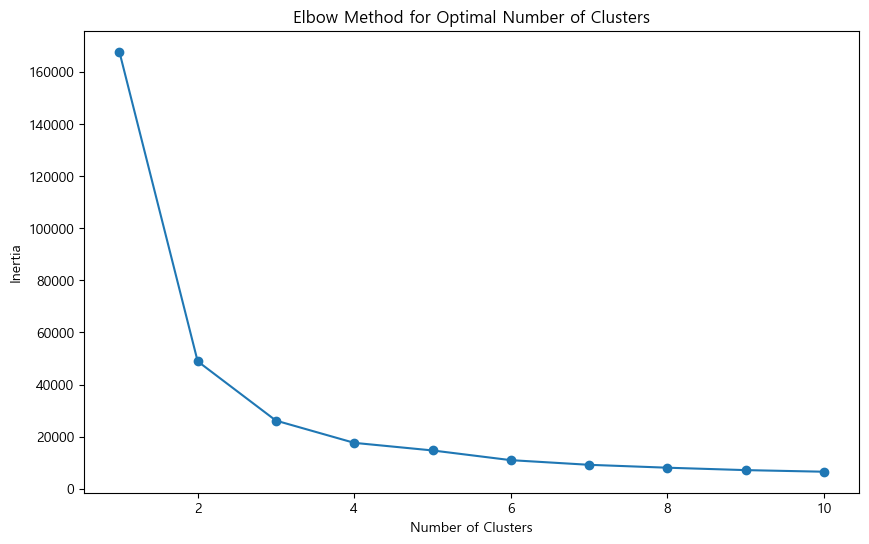

In [291]:
# 엘보우 방법을 사용하여 적절한 클러스터 수 찾기
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


eps: 0.5, min_samples: 3, number of clusters: 87


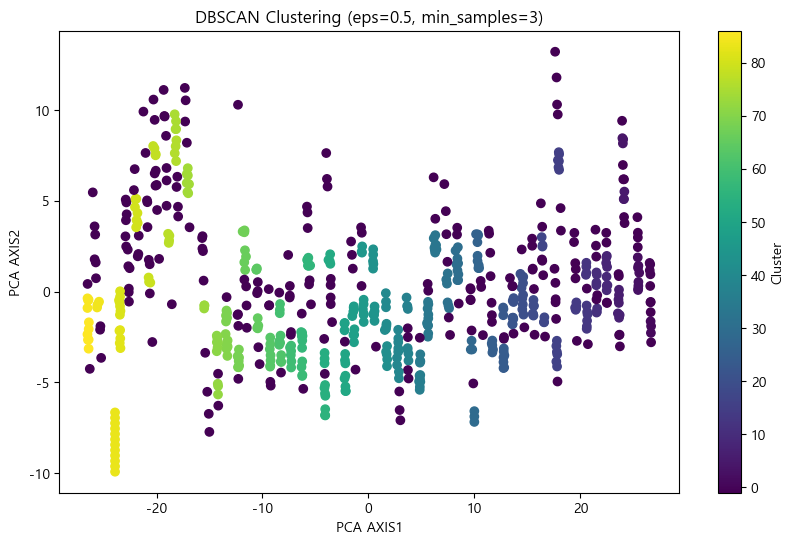

eps: 0.5, min_samples: 5, number of clusters: 20


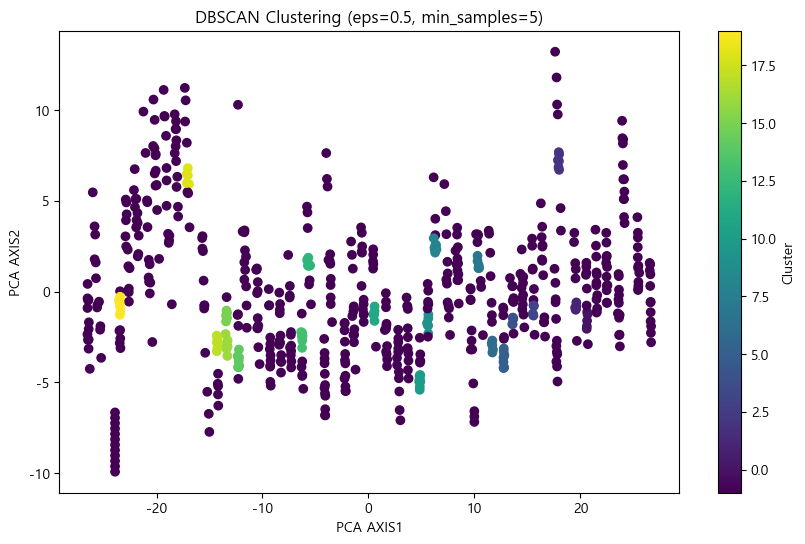

eps: 0.5, min_samples: 7, number of clusters: 4


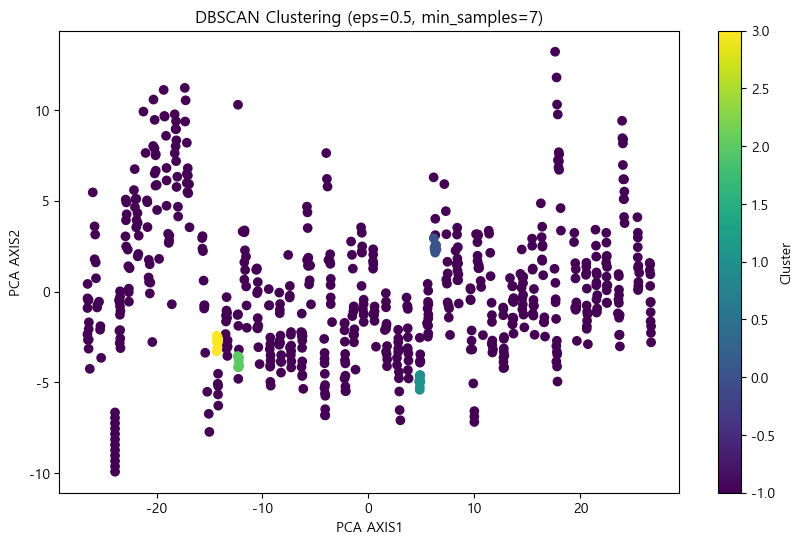

eps: 0.5, min_samples: 10, number of clusters: 0


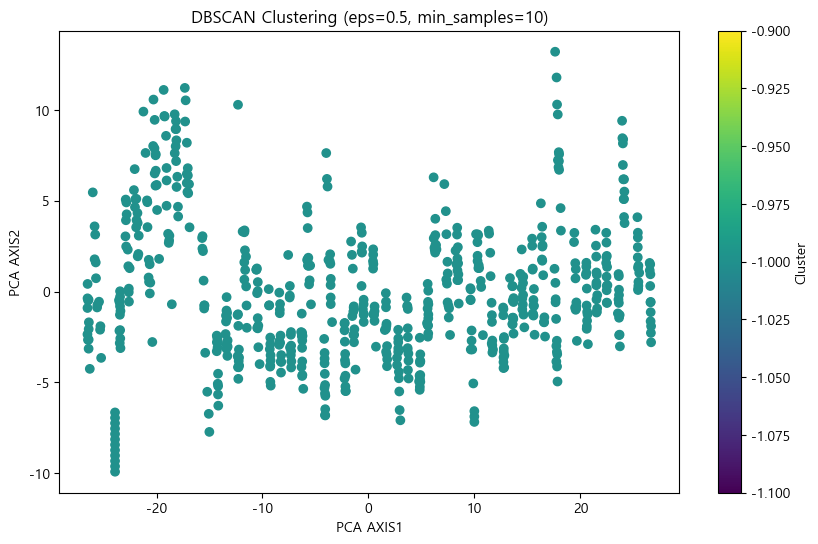

eps: 1.0, min_samples: 3, number of clusters: 47


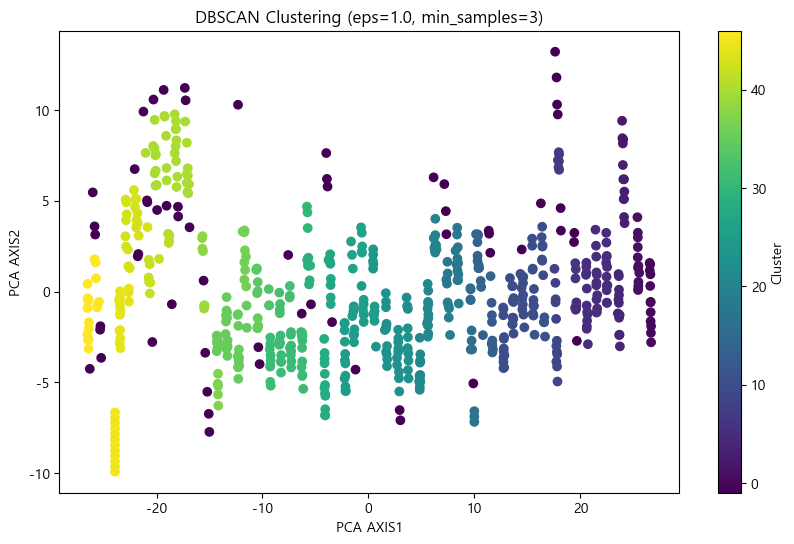

eps: 1.0, min_samples: 5, number of clusters: 38


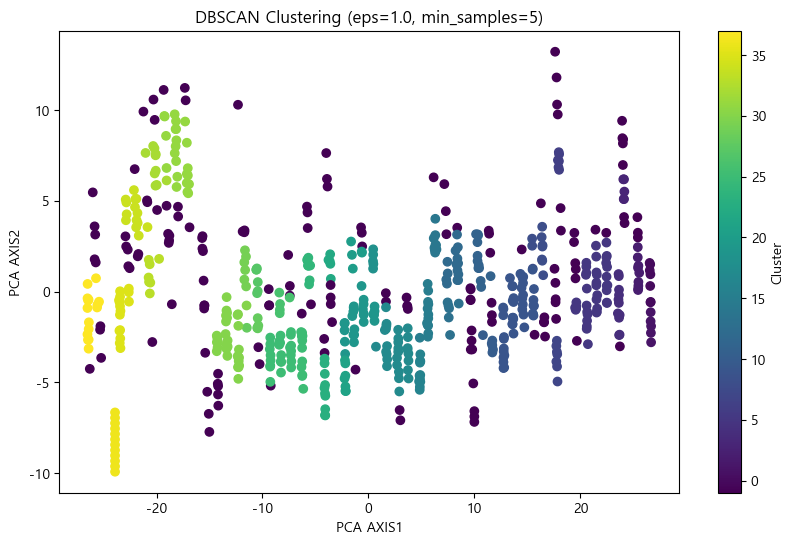

eps: 1.0, min_samples: 7, number of clusters: 23


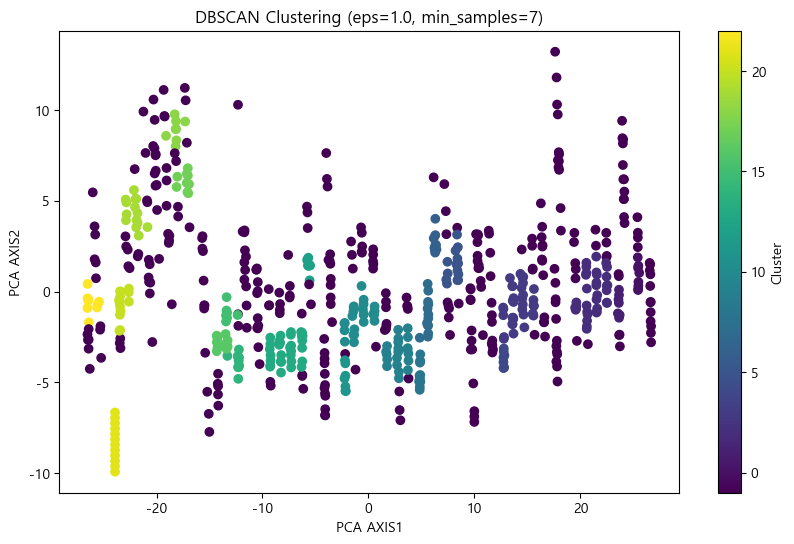

eps: 1.0, min_samples: 10, number of clusters: 10


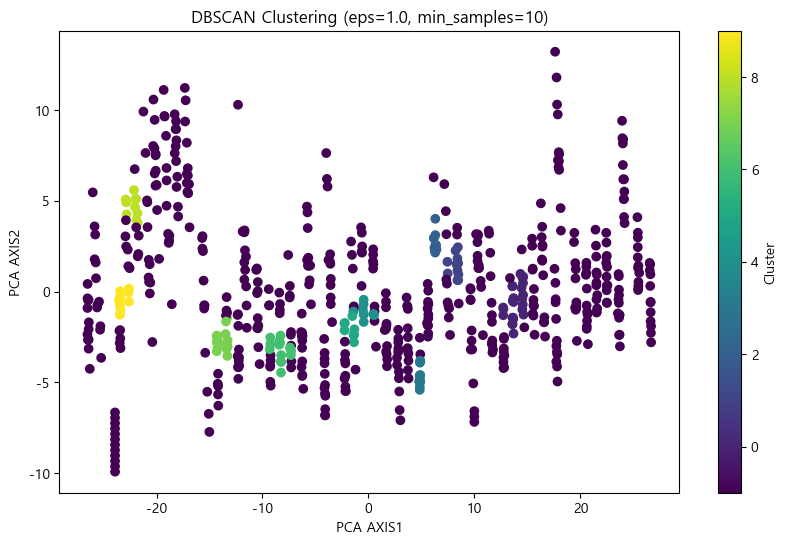

eps: 1.5, min_samples: 3, number of clusters: 14


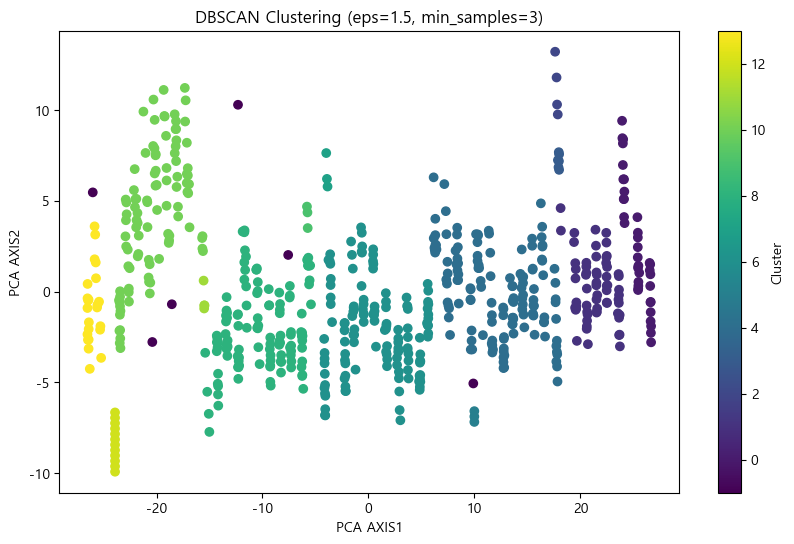

eps: 1.5, min_samples: 5, number of clusters: 11


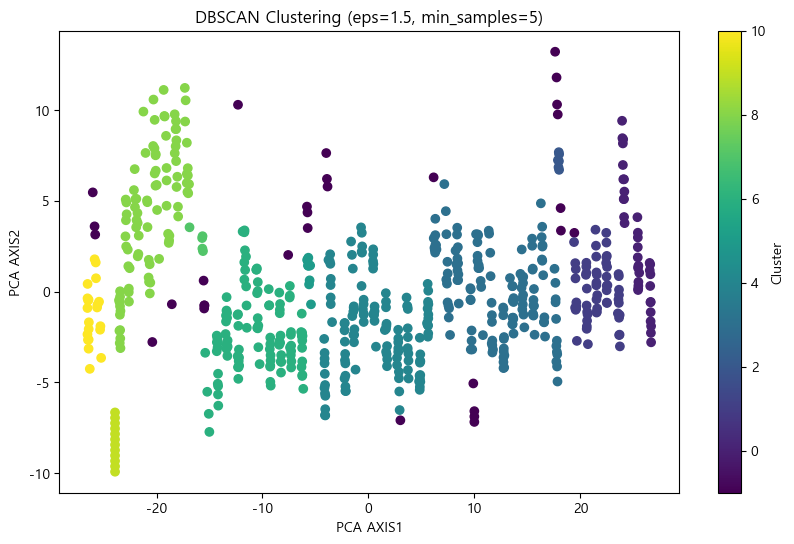

eps: 1.5, min_samples: 7, number of clusters: 12


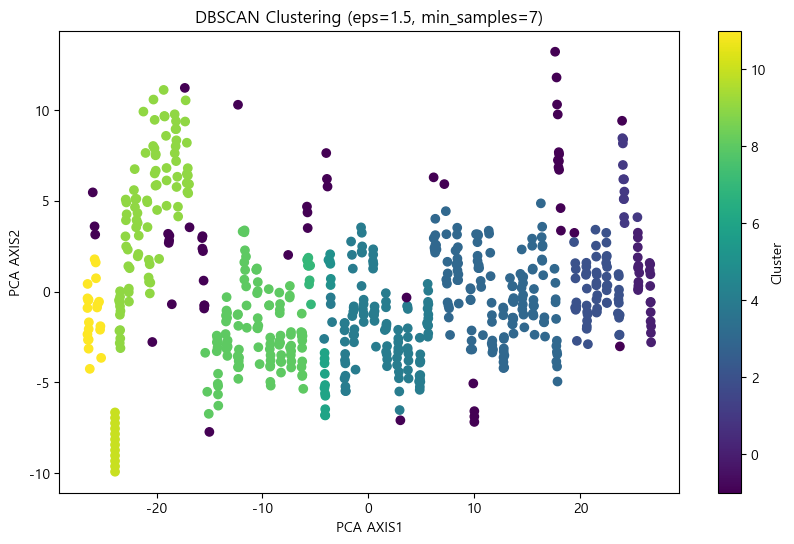

eps: 1.5, min_samples: 10, number of clusters: 11


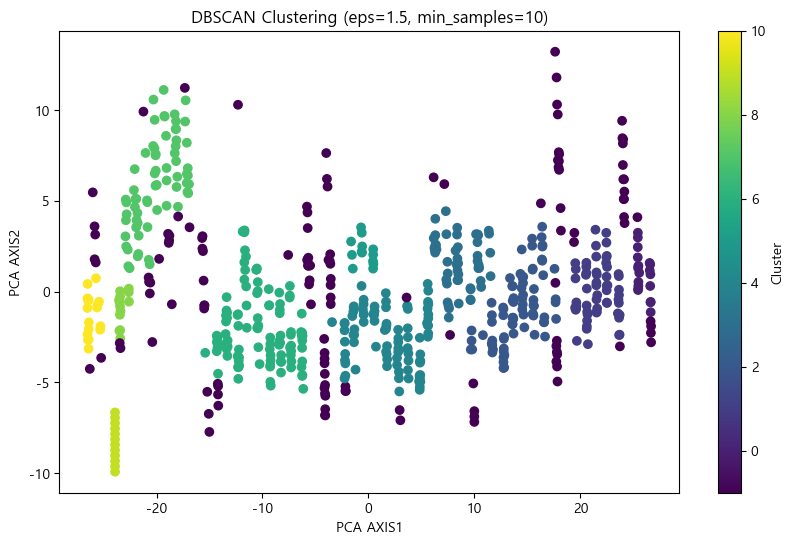

eps: 2.0, min_samples: 3, number of clusters: 5


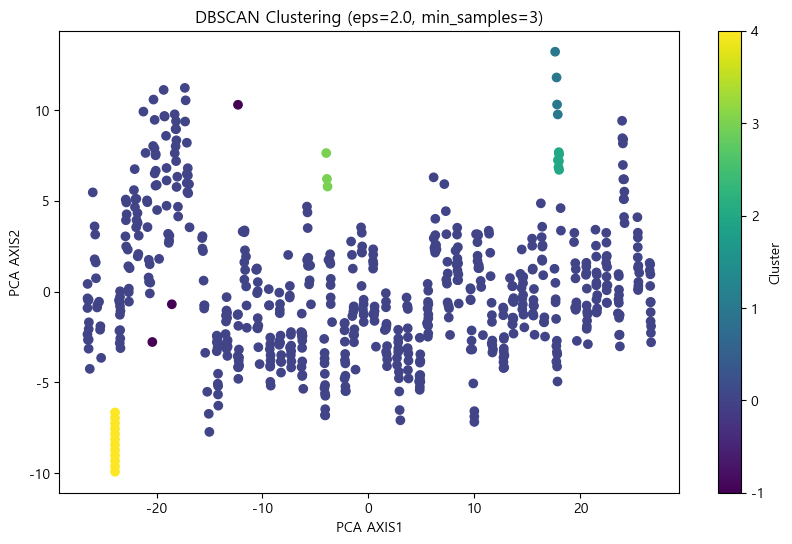

eps: 2.0, min_samples: 5, number of clusters: 3


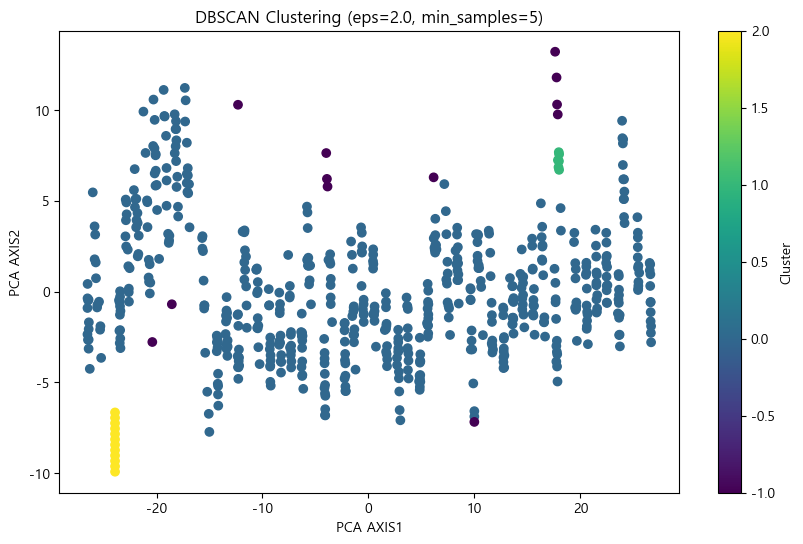

eps: 2.0, min_samples: 7, number of clusters: 3


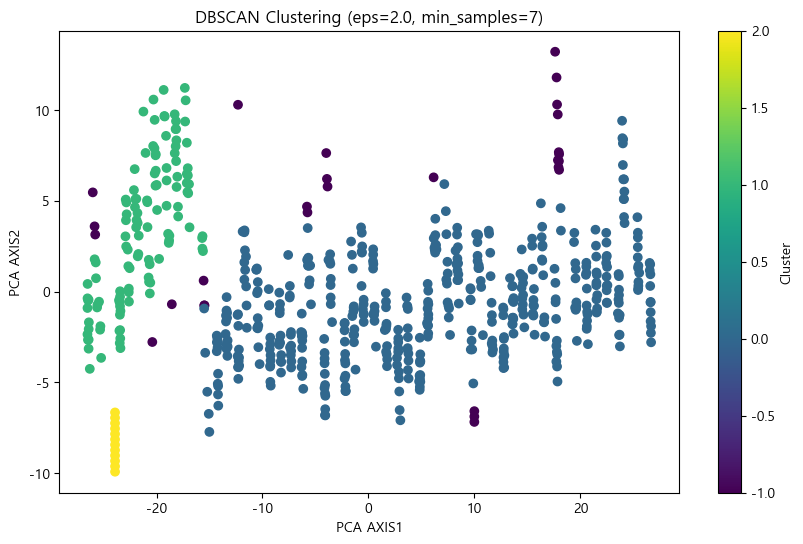

eps: 2.0, min_samples: 10, number of clusters: 3


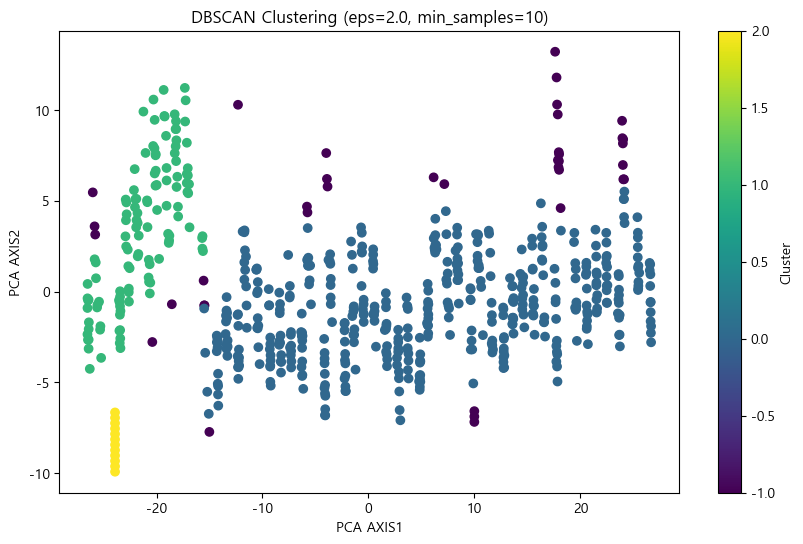

In [293]:
from sklearn.cluster import DBSCAN

# 최적의 eps와 min_samples를 찾기 위해 반복 시도
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(X_pca)
        unique_clusters = np.unique(clusters_dbscan)
        print(f'eps: {eps}, min_samples: {min_samples}, number of clusters: {len(unique_clusters) - 1}')  # -1 for noise

        # 클러스터링 결과 시각화
        plt.figure(figsize=(10, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan, cmap='viridis')
        plt.xlabel('PCA AXIS1')
        plt.ylabel('PCA AXIS2')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.colorbar(label='Cluster')
        plt.show()


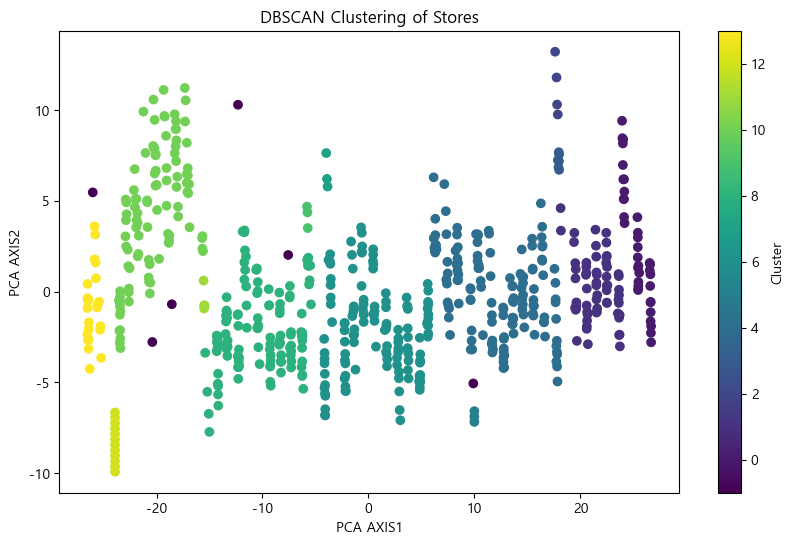

In [294]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=1.5, min_samples=3)
clusters_dbscan = dbscan.fit_predict(X_pca)

# 결과를 DataFrame에 저장
pivot_df['cluster'] = clusters_dbscan

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pivot_df['cluster'], cmap='viridis')
plt.xlabel('PCA AXIS1')
plt.ylabel('PCA AXIS2')
plt.title('DBSCAN Clustering of Stores')
plt.colorbar(label='Cluster')
plt.show()


In [309]:
# 최적의 매개변수로 DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=1.5, min_samples=10)  # 예시로 최적의 값을 선택
clusters_dbscan = dbscan.fit_predict(X_pca)

# 실루엣 스코어 계산
mask = clusters_dbscan != -1
if np.sum(mask) > 0:  # 클러스터가 존재하는지 확인
    sil_score = silhouette_score(X_pca[mask], clusters_dbscan[mask])
    print(f'Silhouette Score: {sil_score}')
else:
    print('No clusters found')


Silhouette Score: 0.45851769081847255
